[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%203/3.11_gradient_tape.ipynb)

## 8-3-2. 자동미분

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# a, b의 Variable 를 생성
a = tf.Variable([1, 2, 3, 4, 5], dtype=tf.float32)
b = tf.Variable([10, 20, 30, 40, 50], dtype=tf.float32)

# 미분 계산을 위해서 a, b가 미분 가능한 객체인지 확인
print(f'a.trainable: {a.trainable}\nb.trainable: {b.trainable}')

a.trainable: True
b.trainable: True


In [ ]:
# c = a * b
# c를 a 대한 편미분 => b
# c를 b 대한 편미분 => c
with tf.GradientTape() as tape:
    c = a * b
grads = tape.gradient(c, [a, b])
tf.print(f'dc/da: {grads[0]}')
tf.print(f'dc/db: {grads[1]}')

dc/da: [10. 20. 30. 40. 50.]
dc/db: [1. 2. 3. 4. 5.]


## 단순선형회귀

In [ ]:
x = tf.Variable(np.random.normal(size=(100, )), dtype=tf.float32)
y = 2*x + 3
print(f'x[:5]: {x[:5].numpy()}\ny[:5]: {y[:5].numpy()}')

x[:5]: [-0.14403531  0.11135218  2.1489954  -1.2511883  -0.5731737 ]
y[:5]: [2.7119293  3.2227044  7.297991   0.49762344 1.8536526 ]


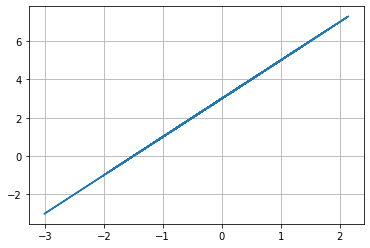

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x.numpy(), y.numpy())
ax.grid()
plt.show()

In [ ]:
# 학습률, 최대 Epoch 정의
learning_rate = 0.25
EPOCHS = 100

# w, b 초기값을 0.0으로 설정. float 타입을 가져야 한다.
w = tf.Variable(0.0)
b = tf.Variable(0.0)

for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
        # y_hat(예측 값)
        y_hat = w*x + b
        # 손실 계산(MSE)
        loss = tf.reduce_mean((y_hat - y)**2)
    
    # 그라디언트 계산
    dw, db = tape.gradient(loss, [w, b])

    # 그라이언트 업데이트
    w = tf.Variable(w - learning_rate * dw)
    b = tf.Variable(b - learning_rate * db)

    print(f'epoch: {epoch}, loss: {loss.numpy():.4f}, w: {w.numpy():.4f}, b: {b.numpy():.4f}')

    # Error가 0.0005보다 작으면 루프 종료
    if loss.numpy() < 0.0005:
        break

epoch: 0, loss: 11.6724, w: 0.8198, b: 1.3989
epoch: 1, loss: 3.5346, w: 1.3121, b: 2.1397
epoch: 2, loss: 1.0800, w: 1.6028, b: 2.5351
epoch: 3, loss: 0.3321, w: 1.7722, b: 2.7475
epoch: 4, loss: 0.1026, w: 1.8701, b: 2.8622
epoch: 5, loss: 0.0318, w: 1.9262, b: 2.9245
epoch: 6, loss: 0.0099, w: 1.9582, b: 2.9585
epoch: 7, loss: 0.0031, w: 1.9764, b: 2.9772
epoch: 8, loss: 0.0010, w: 1.9867, b: 2.9874
epoch: 9, loss: 0.0003, w: 1.9925, b: 2.9930
